<a href="https://colab.research.google.com/github/chandusayhi/Cardiovascular_Risk_Prediction/blob/main/Chandrakant_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>Classification model to predict 10-year risk of future coronary heart disease (CHD)</b>

Heart disease refers to various types of conditions that can affect heart function. These types include: coronary artery (atherosclerotic) disease that affects the blood supply to the heart, valvular heart disease that affects how the valves function to regulate blood flow, cardiomyopathies that affect heart muscles, heart rhythm disturbances (arrhythmias) that affect the electrical conduction and congenital heart diseases where the heart has structural defects that develop before birth.

Heart disease is the major cause of morbidity and mortality globally: it accounts for more deaths annually than any other cause. For example an estimated 17.9 million people died from heart diseases in 2016, representing 31% of all global deaths. Over three quarters of these deaths took place in low- and middle-income countries.

Most heart diseases are highly preventable and simple lifestyle modifications(such as reducing tobacco use, eating healthily, obesity and exercising) coupled with early treatment greately improve their prognoses. It is, however, difficult to identify high risk patients because of the mulfactorial nature of several contributory risk factors such as diabetes, high blood pressure, high cholesterol et cetera. Due to such constraints, scientists have turned towards modern approaches like Data Mining and Machine Learning for predicting the disease.

Machine learning (ML), due to its superiority in pattern detection and classification, proves to be effective in assisting decision making and risk assesment from the large quantity of data produced by the healthcare industry on heart disease.

In this notebook, I will be exploring different Machine Learning approaches for predicting wheather a patient has 10-year risk of developing coronary heart disease (CHD) using the Framingham dataset.




<h1><b>Problem Statement</b>

Predict whether a patient has risk of developing coronary heart disease. 

<h1><b>How to solve it?</b>

Using classification machine learning models to predict. In this study in particular, I will go over some of the classification algorithms in detail to consolidate the knowledge on these tools.  

<h1><b>Dataset</b>

The dataset is made available on almabetter website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

<h1><b>About the data</b>

The dataset is from a cardiovascular study on residents of the town of Framingham, Massachusetts. It includes over 4,240 records and 15 attributes.

The information provided by the dataset are:

<h3><b>Demographics:</b>

* Sex: male or female(Nominal)
* Age: the age of the patient at the time of the study (Coninuous)
* Education level

<h3><b>Behavioral:</b>

* Current Smoker: whether or not the patient is a current smoker (Nominal)(0 - No, 1 - Yes)
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day. (Continuous)

<h3><b>Medical History:</b>

* BP Meds: whether or not the patient was on blood pressure medication (binary - 0 - No, 1 - Yes)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (binary - 0 - No, 1 - Yes)
* Diabetes: whether or not the patient had diabetes (Nominal) (binary - 0 - No, 1 - Yes)

<h3><b>Target variable:</b>

* 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

<h3><b>We are going to perform the following steps: </b>

1. Read the file and display columns.
2. Handle missing values, Outliers and Duplicate Data
3. Calculate basic statistics of the data (count, mean, std, etc) and exploratory analysts and describe your observations.
4. Select columns that will be probably important to predict heart disease.
5. If you remove columns explain why you removed those.
6. Create training and testing sets (use 60% of the data for the training and remaining data for testing).
7. Build a machine learning model to predict TenYearCHD
Evaluate the model (f1 score, Accuracy, Precision ,Recall and Confusion Matrix)
8. Conclude your findings (Model which is giving best f1 score)


In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
#from mlxtend.classifier import StackingCVClassifier

In [2]:
#load the data
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capestone_Projects/Supervised_ML_Classification/data_cardiovascular_risk.csv')
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [3]:
# Finding the dimensions of the dataset
data.shape

(3390, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

This shows an overview of the Columns, non-null count and the data types of the dataset

<h1><b>Missing variables</b>

Handling missing data is important as many machine learning algorithms do not support data with missing values.

In [5]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.04%


In [6]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
education,87,2.566372
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


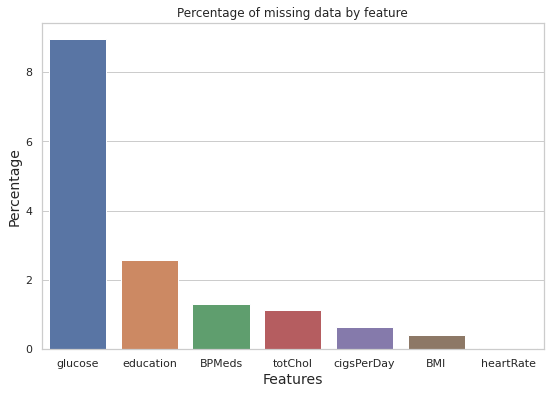

In [7]:
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

At 8.96%, the blood glucose entry has the highest percentage of missing data. The other features have very few missing entries.


Missing data can be treated by essentially two methods:
* Imputation 
* Deleting 

Some reasons why data goes missing:
* **MAR (missing at random)**: propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data
* **MCAR (Missing Completely at Random)**: when the probability that the data are missing is not related to either the specific value which is supposed to be obtained or the set of observed responses.
* **MNAR (Missing not at random)**: the missing value depends on the hypothetical value or missing value is dependent on other variable's value. According to a sutdy on the [Korean Journal of Anesthesiology](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/) this type of missing data is more problematic and the only way to obtain an unbiased estimate of the parameters in such a case is to model the missing data. The model may then be incorporated into a more complex one for estimating the missing values.

Out of 3390 rows 510, (15.04%) of the rows have missing values. Looking at each variable, the one with the highest percentage of missing values is glucose (9%). As all the variables with missing values have less than 25% of missing information, it will not be considered deleting the whole column but only the rows that contain missing information. 
I understand that most of the variables with missing numbers are related to medical records and it is better not to impute this type of information. 

The best method for handling missing data, in such a study, [would be to plan the study more carefully](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/), especially the data collection step.  

In [8]:
print((data["glucose"].mode())[0])

75.0


In [9]:
data["glucose"].fillna((data["glucose"].mode())[0], inplace=True)

Filling the missing spaces of `glucose`column with the mode of the data (Mode = 75) present to reduce the number of missing data in our dataset

In [10]:
# drop missing entries
data.dropna(axis=0, inplace=True)

In [11]:
data.shape

(3189, 17)

In [12]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage


In [13]:
#Duplicated data
data.duplicated().sum()

0

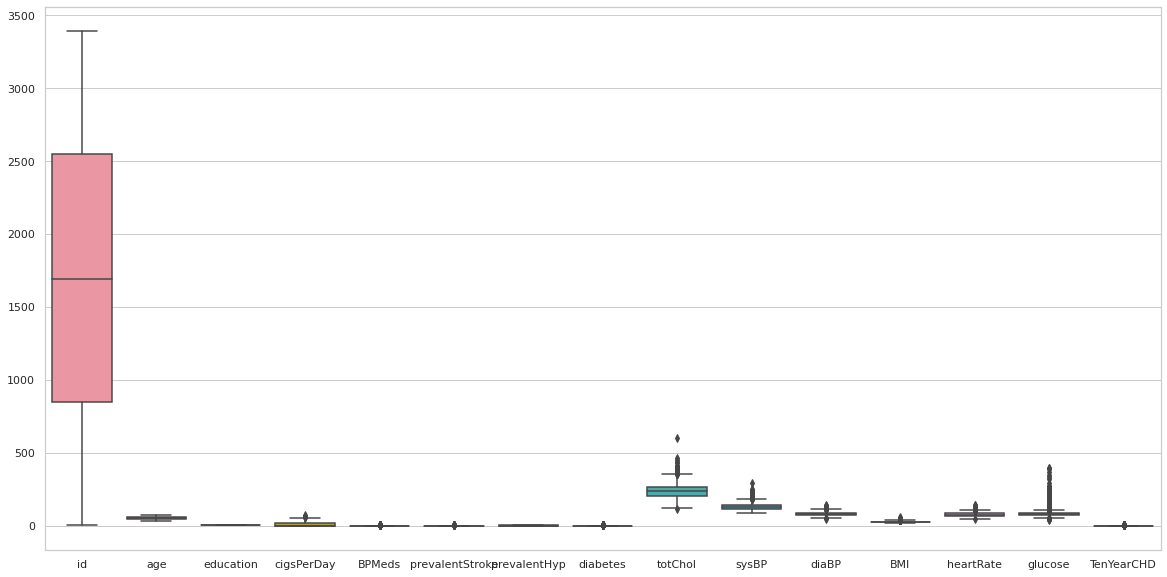

In [14]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

Removable Outliers are detected in totChol and sysBP columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed.

In [15]:
data['totChol'].max()

600.0

The Outlier present in totChol is 600.

In [16]:
data['sysBP'].max()

295.0

In [17]:
data = data[data['totChol']<600.0]
data = data[data['sysBP']<295.0]
data.shape

(3187, 17)

Now with the missing values, outliers and duplicate values dealt with, we proceed to perform EDA

In [18]:
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000,3187.000000
mean,1696.561657,49.418575,1.973015,9.103859,0.029495,0.005962,0.312833,0.025102,236.849702,132.376843,82.821305,25.769693,76.028553,81.349859,0.148415
std,980.937891,8.554900,1.018609,11.866153,0.169215,0.076994,0.463720,0.156459,44.084212,21.990752,11.960124,4.127440,12.057203,23.156614,0.355567
min,1.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.500000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,22.935000,68.000000,72.000000,0.000000
50%,1691.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.360000,75.000000,77.000000,0.000000
75%,2547.500000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.500000,27.985000,83.000000,85.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,464.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


An overall Statistical Information is shown

1. It is clearly evident that none of the data is missing in columns.
2. It also shows the mean, standard deviation and other statistical metrices of the dataset
3. It also shows the categorical data of the dataset since they were already converted into discrete numerical values

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,1.000000,0.018961,-0.033326,-0.019599,0.009922,-0.039304,0.013195,0.003170,-0.014414,0.022757,0.000674,0.037260,0.022067,0.011048,0.010740
age,0.018961,1.000000,-0.166408,-0.184318,0.131968,0.043386,0.308066,0.106817,0.283792,0.401506,0.222285,0.134104,0.004266,0.107320,0.229073
education,-0.033326,-0.166408,1.000000,0.006984,-0.019054,-0.025963,-0.084455,-0.048924,-0.022472,-0.135254,-0.061289,-0.130679,-0.052302,-0.034676,-0.053068
cigsPerDay,-0.019599,-0.184318,0.006984,1.000000,-0.034978,-0.044309,-0.075611,-0.046544,-0.022103,-0.095560,-0.059887,-0.095397,0.058543,-0.060473,0.066273
BPMeds,0.009922,0.131968,-0.019054,-0.034978,1.000000,0.131047,0.258374,0.066869,0.089837,0.271986,0.203832,0.089156,0.019432,0.067775,0.094155
prevalentStroke,-0.039304,0.043386,-0.025963,-0.044309,0.131047,1.000000,0.062031,0.013629,-0.002510,0.055862,0.052285,0.024392,-0.012693,0.021540,0.047925
prevalentHyp,0.013195,0.308066,-0.084455,-0.075611,0.258374,0.062031,1.000000,0.073428,0.157881,0.699252,0.611440,0.303776,0.154183,0.082141,0.161863
diabetes,0.003170,0.106817,-0.048924,-0.046544,0.066869,0.013629,0.073428,1.000000,0.048192,0.107358,0.057833,0.083761,0.037056,0.609109,0.090987
totChol,-0.014414,0.283792,-0.022472,-0.022103,0.089837,-0.002510,0.157881,0.048192,1.000000,0.204350,0.161553,0.118705,0.085749,0.059050,0.089329
sysBP,0.022757,0.401506,-0.135254,-0.095560,0.271986,0.055862,0.699252,0.107358,0.204350,1.000000,0.782311,0.335020,0.181805,0.133197,0.206437


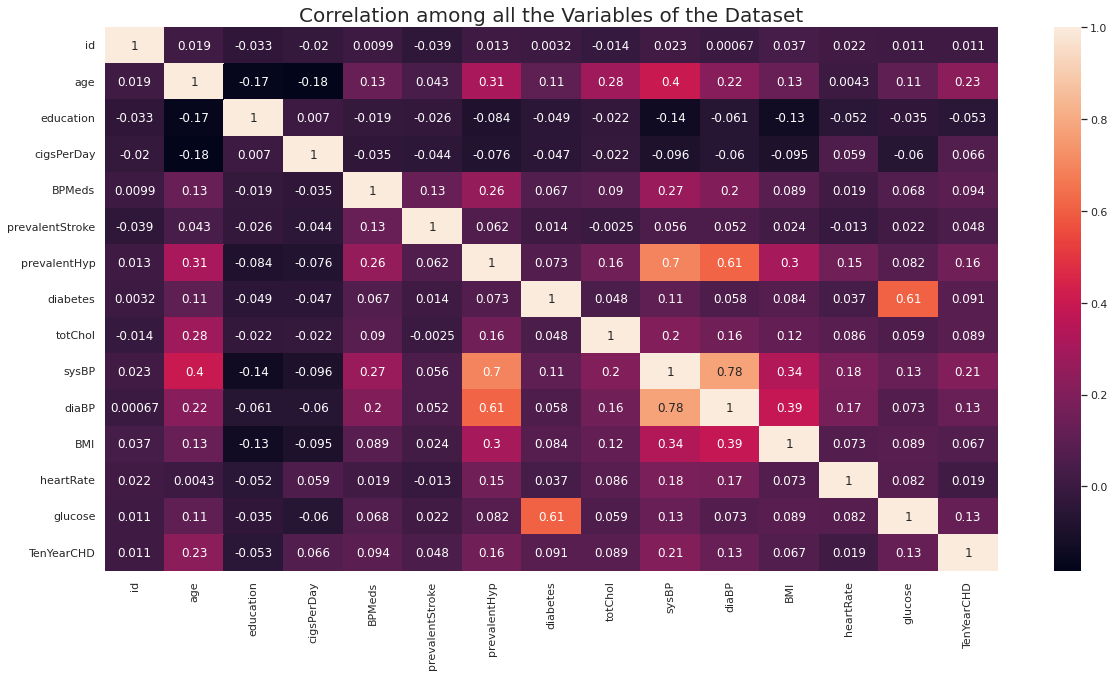

In [19]:
#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. However the features with the highest correlations are age, prevalent hypertension and systolic blood pressure

Also there are a couple of features that are highly correlated with one another and it makes no sense to use both of them in building a machine learning model. These incluse: Blood glucose and diabetes (obviously); systolic and diastolic blood pressures; cigarette smoking and the number of cigarretes smoked per day. Therefore we need to carry out feature selection to pick the best features

Compared to all the independent data, the correlation coefficient between education and and target variable TenYearCHD is very low and actually negative.

We are dropping the column education because a doctor would have to decide on which education level to put a patient and this could result in very subjective outcomes and it is also not very handy to put in practice.

The two features are not correlated to the outcome variable. In that case we would have kept them.

Categorical Features

In [25]:
categorical_features = ['education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [26]:
for feature in categorical_features:
    print(feature,':')
    print(data[feature].value_counts())
    print("-----------------")

education :
1.0    1337
2.0     959
3.0     531
4.0     360
Name: education, dtype: int64
-----------------
cigsPerDay :
0.0     1608
20.0     578
30.0     168
15.0     166
10.0     101
5.0       99
9.0       95
3.0       72
40.0      57
1.0       46
43.0      41
25.0      41
35.0      17
2.0       15
6.0       13
8.0        9
7.0        8
60.0       7
18.0       6
4.0        6
50.0       5
17.0       5
23.0       5
11.0       4
13.0       3
12.0       3
19.0       2
45.0       2
16.0       2
14.0       1
38.0       1
70.0       1
Name: cigsPerDay, dtype: int64
-----------------
BPMeds :
0.0    3093
1.0      94
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    3168
1      19
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2190
1     997
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    3107
1      80
Name: diabetes, dtype: int64
-----------------


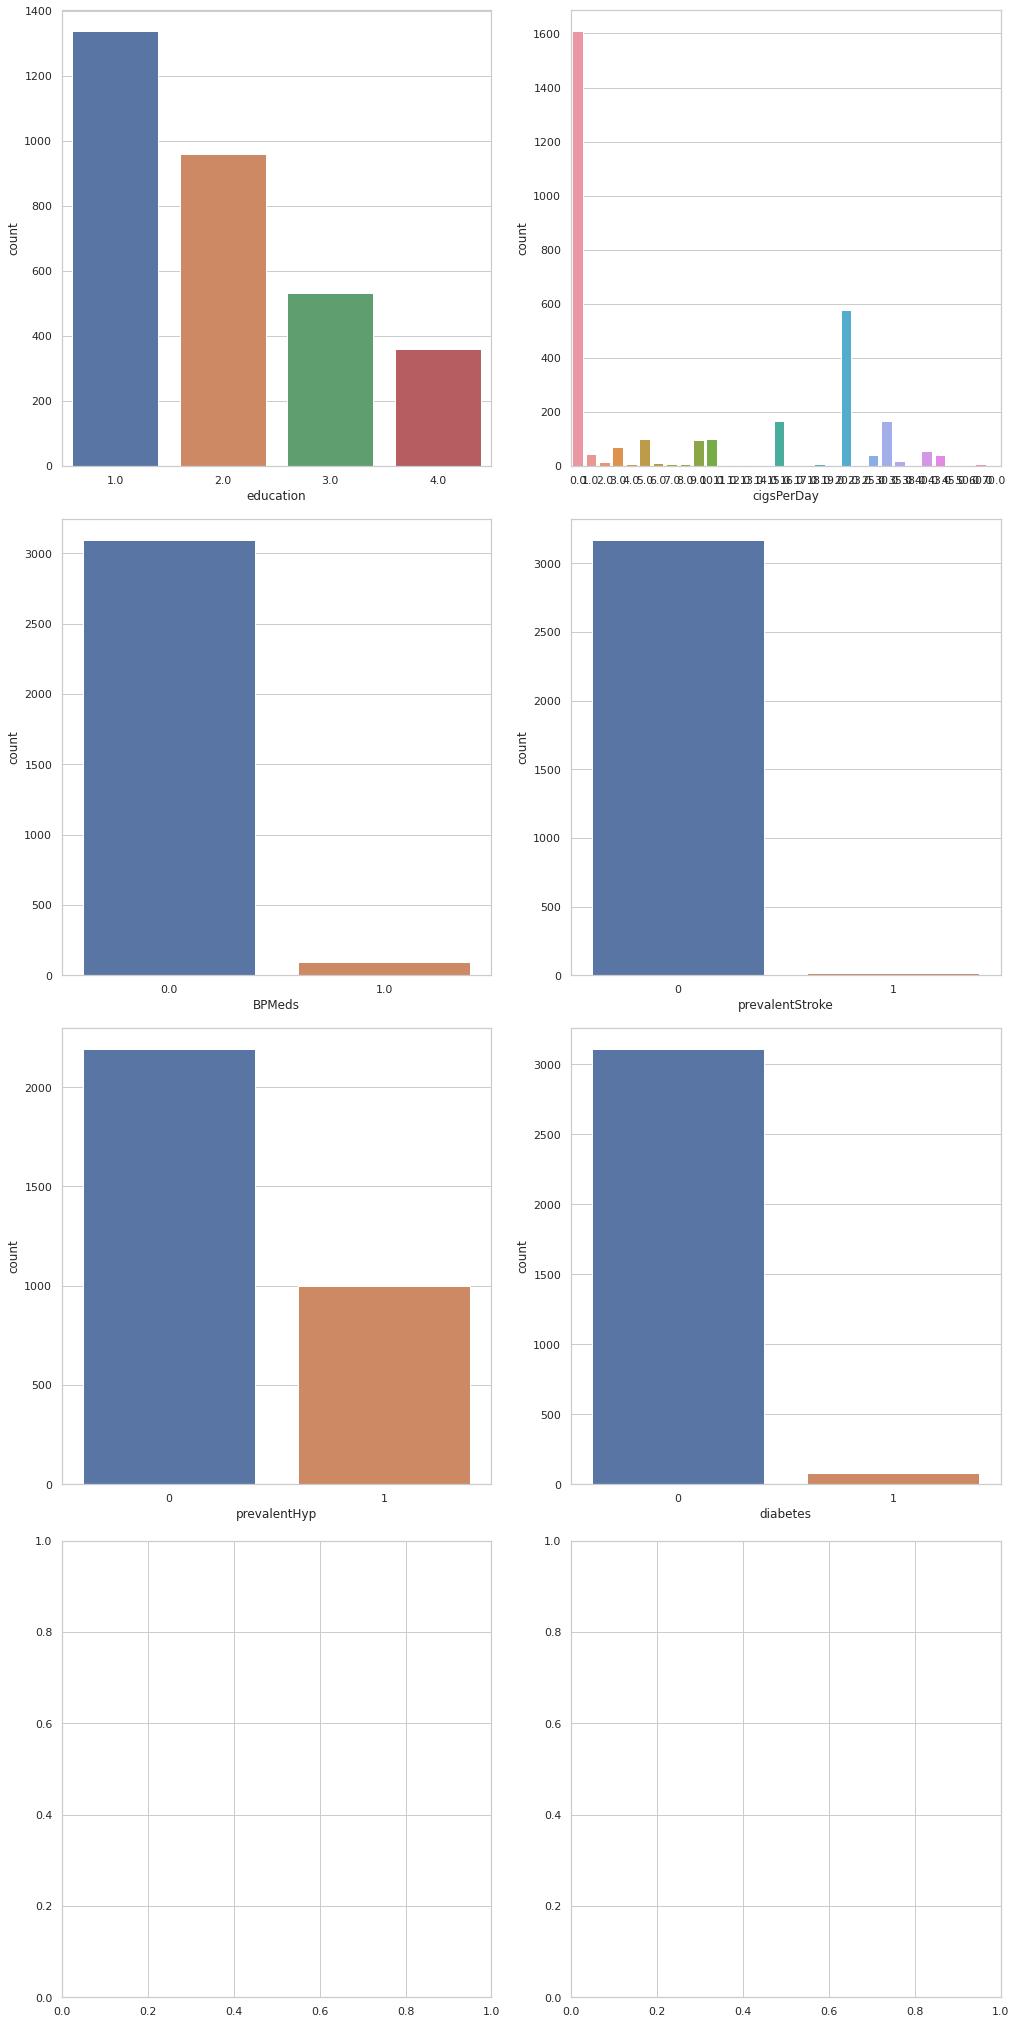

In [27]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data, ax=axs[row][pos])

Among the categorical features:

1. BPmeds, prevalentStroke and diabetes are highly imbalanced.
2. There are four levels of education whereas the rest categorical features are all binary
3. The number of Smokers and non-Smokers in currentSmoker is almost the same

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


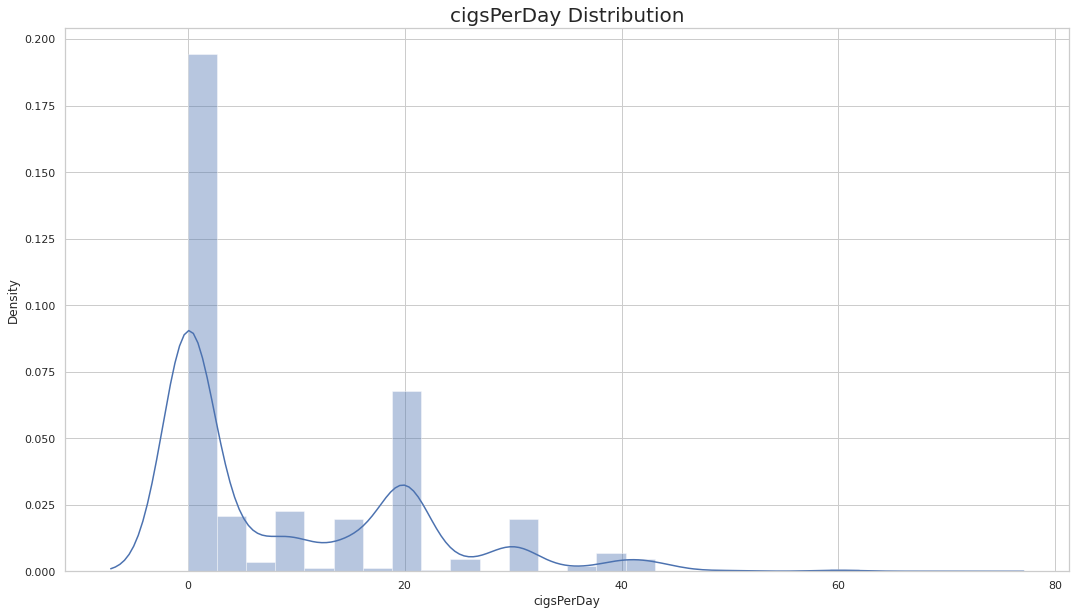

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


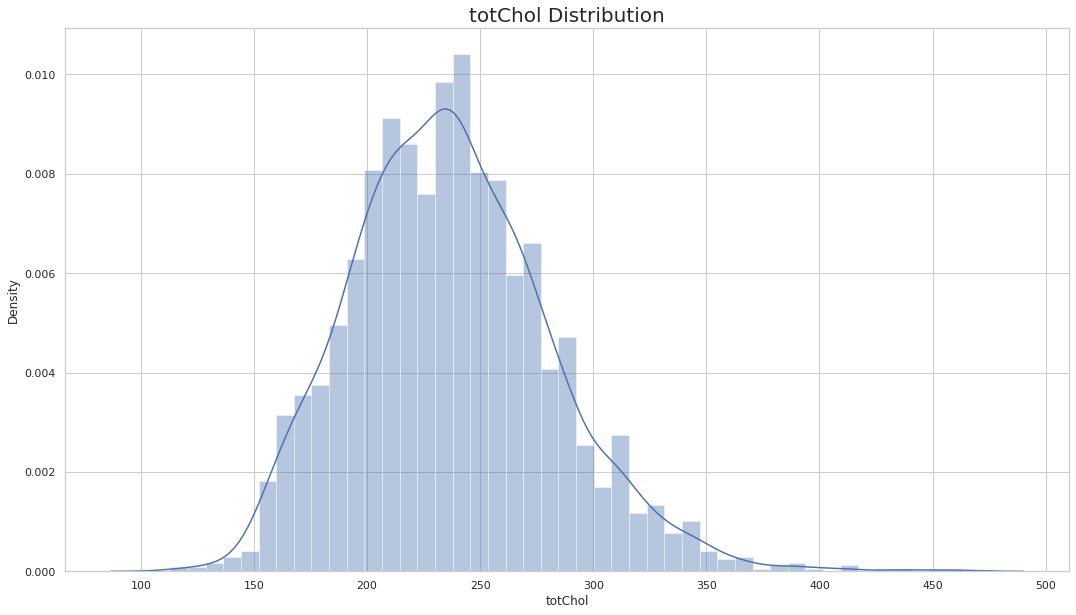

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


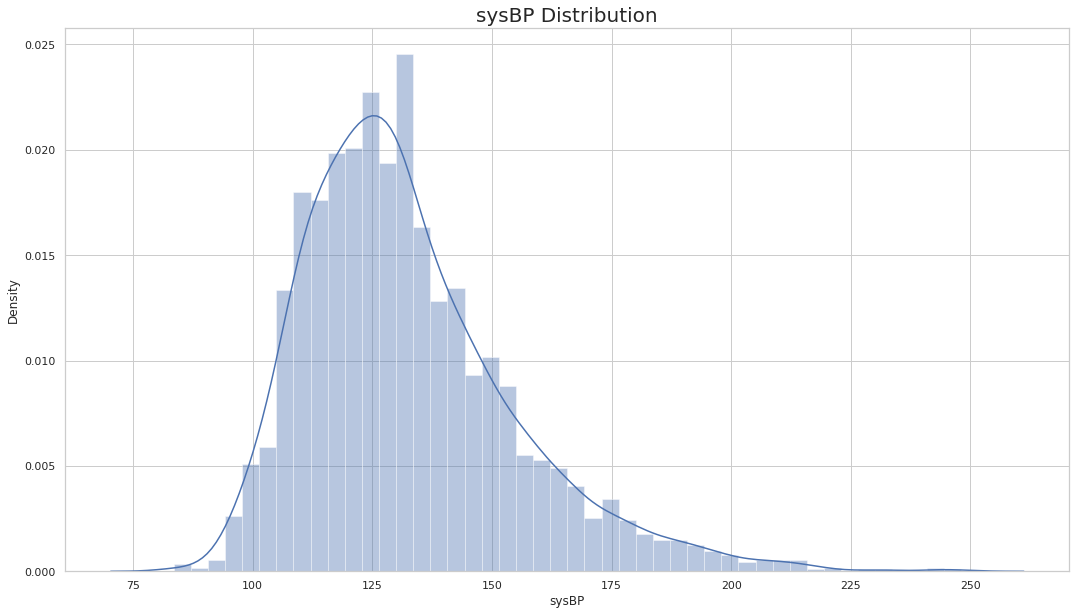

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


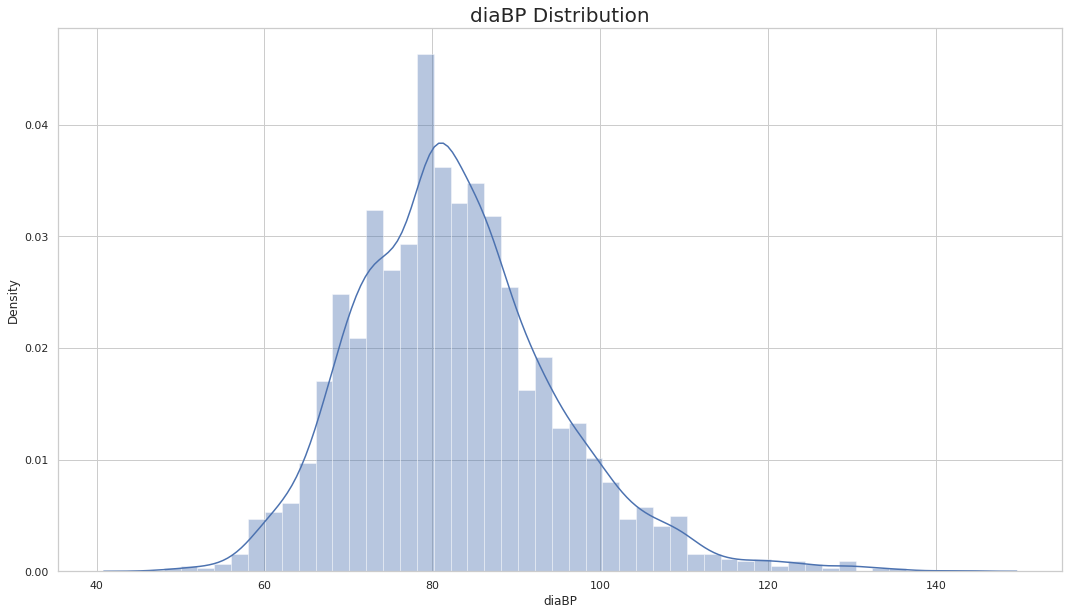

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


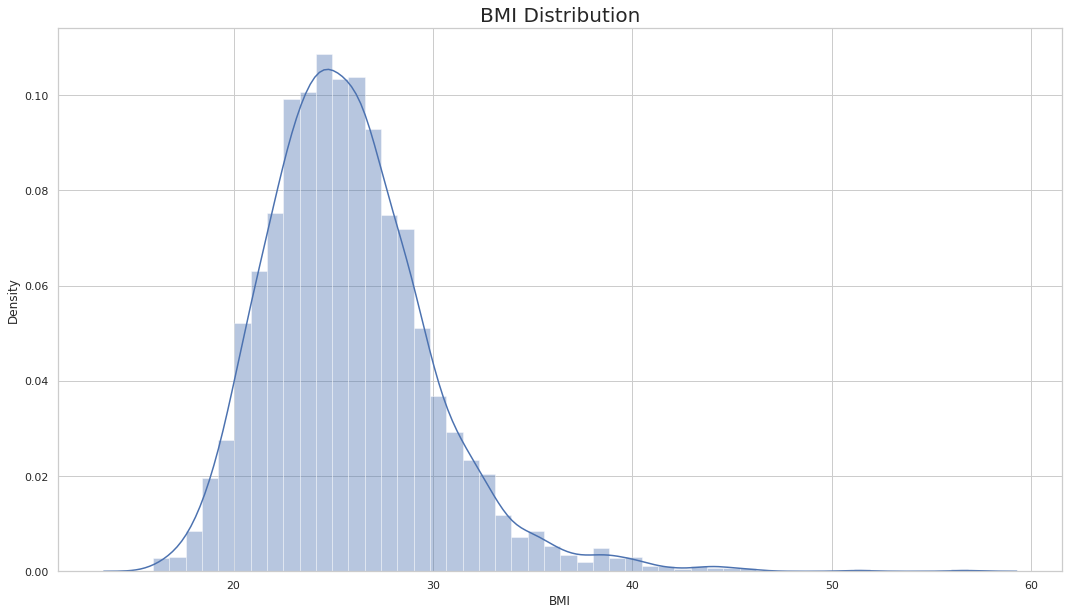

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


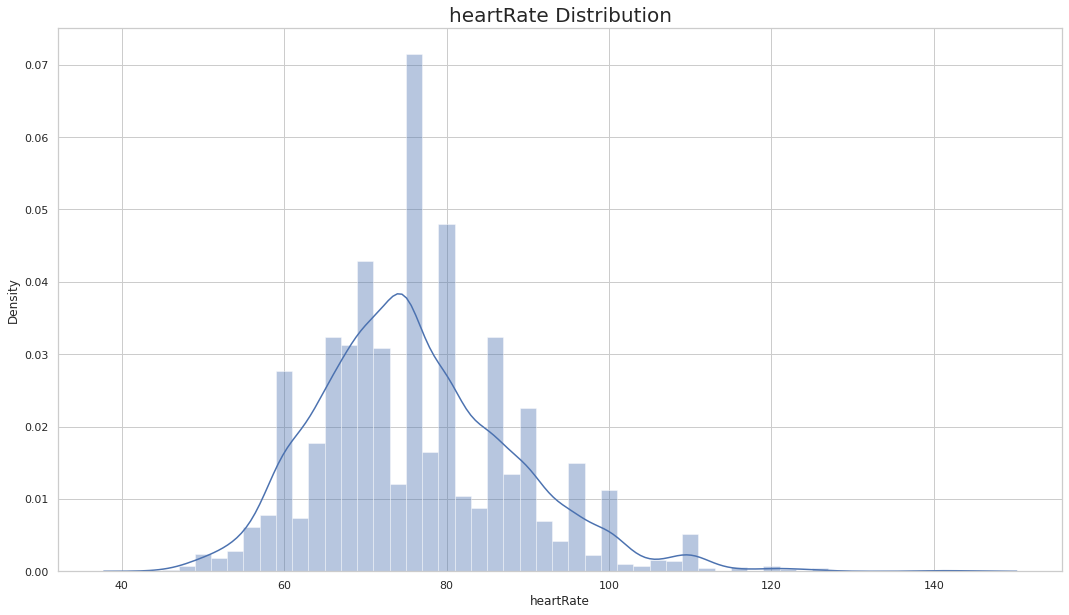

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


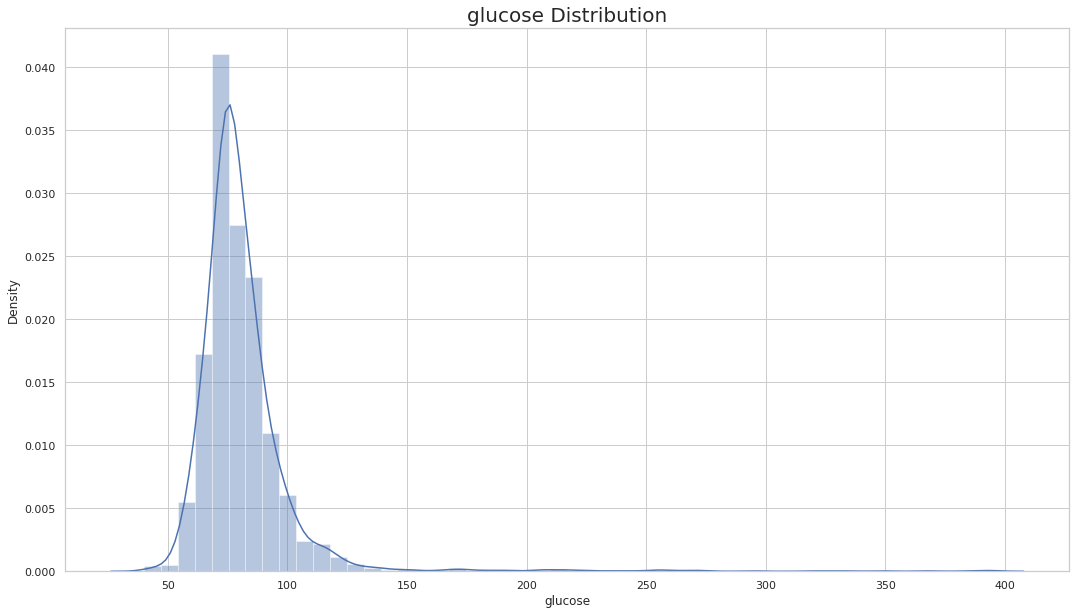

In [28]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(data[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

Among the numerical features:

1. totChol, sysBP, diaBPand BMI has an uniform distribution and the rest are unevenly distributed
2. cigsPerDay has a highly uneven distribution with the most data present in 0
3. cigsPerDay and sysBP shows quite a bit and slight right skewness respectively.

<h1><b>Data Distribution

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


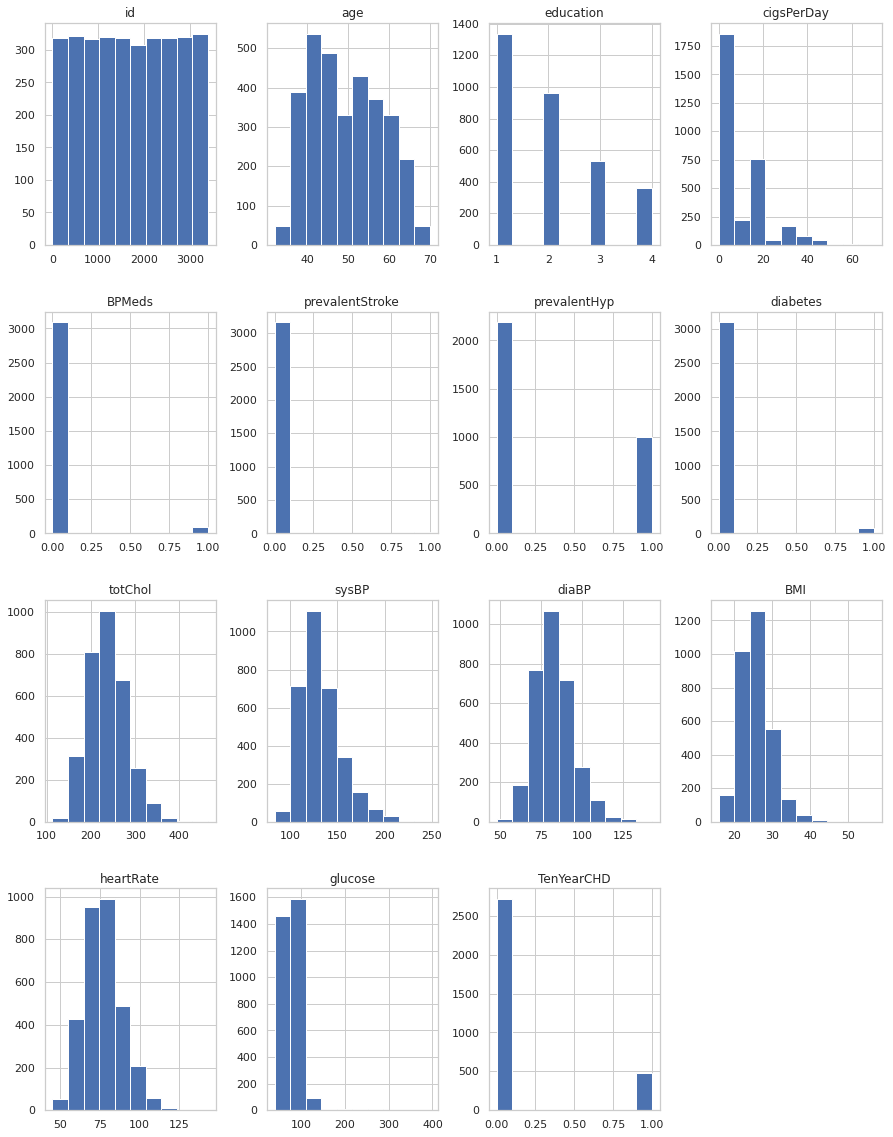

In [20]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

The data on the prevalent stroke, diabetes, and blood pressure meds are poorly balanced